In [19]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
%matplotlib inline

In [32]:
# params
secondsPerDay = 86400

# io params
conc = ["0", "40", "80", "100"]
loc = "/scratch/hcm7920/ambData/"

# plot params
deepIndex = 35

In [21]:
# grid
time = np.load(loc+"gridTimeSpinUp.npy")
levs = np.load(loc+"gridLevs.npy")


In [22]:
# data
keLevMean = np.load(loc+"keLevMeanSpinUp.npy")
keLevMax  = np.load(loc+"keLevMaxSpinUp.npy")

In [23]:
# calculate relative KE vals
keLevMeanRel = np.zeros(shape=keLevMean.shape)
for i in range(len(conc)):
    for ts in range(0,len(time),100):
        keLevMeanRel[ts:ts+100,:,i] = keLevMean[ts:ts+100,:,i] / keLevMean[ts:ts+100,:,0]

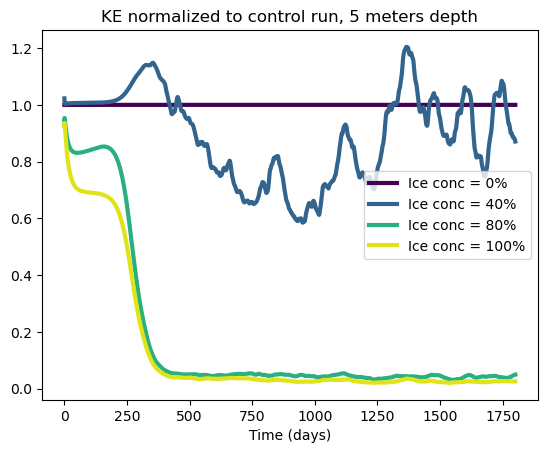

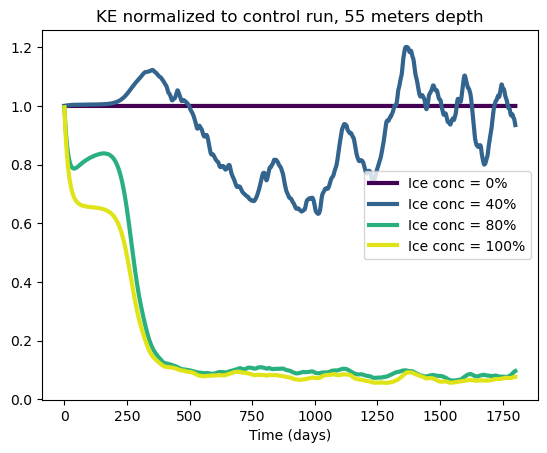

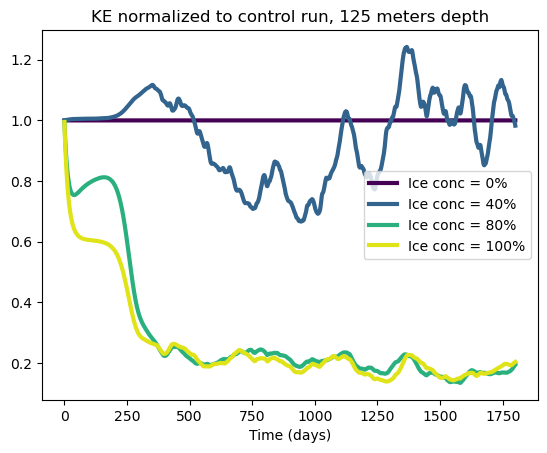

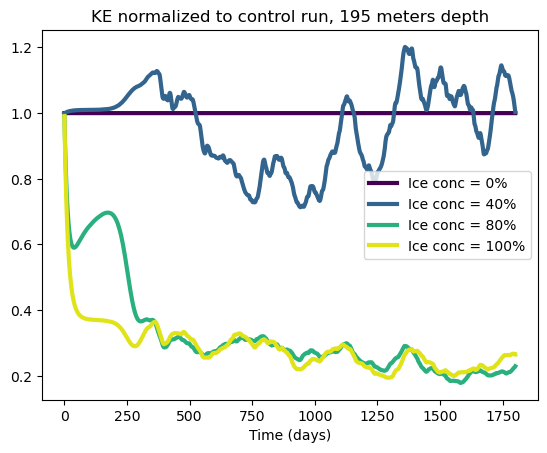

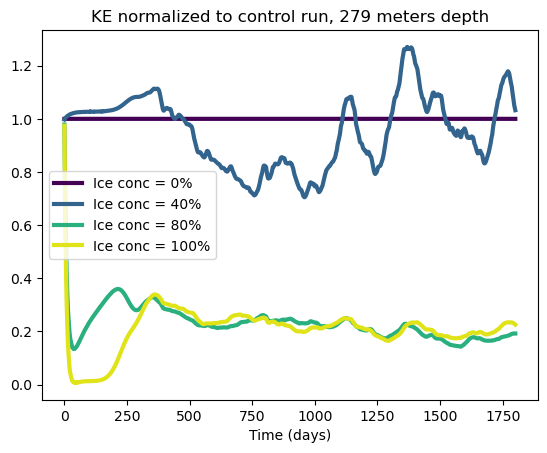

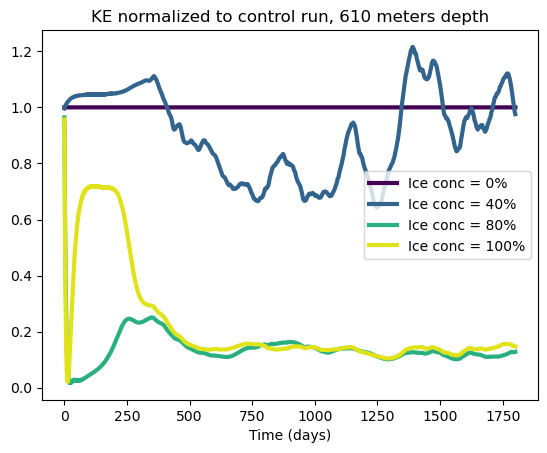

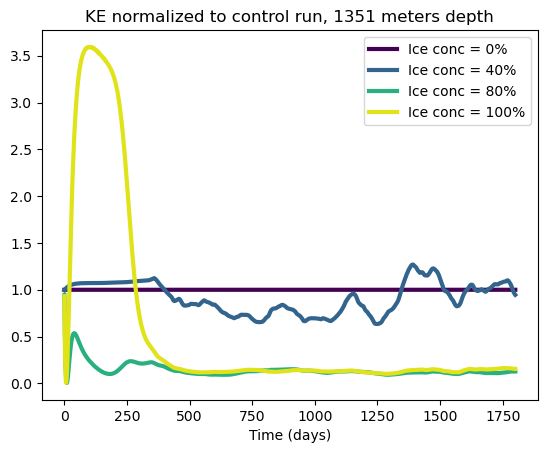

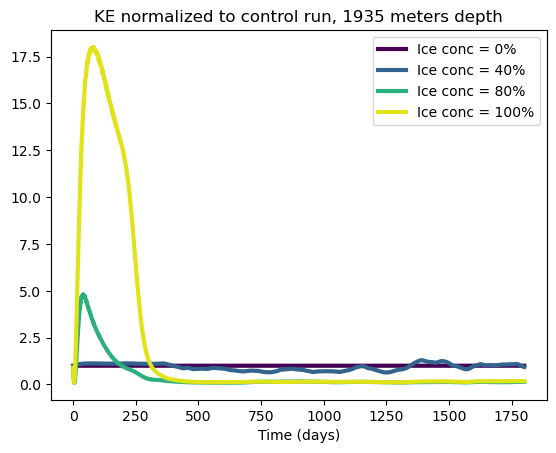

In [24]:
# Line plots
for zl in [0,5,12,19,25,32,40,45]:
    plt.figure()
    colors = plt.cm.viridis(np.linspace(0,0.95,len(conc)))
    for i in range(len(conc)):
        plt.plot(time, keLevMeanRel[:,zl,i],
                linewidth=3, color=colors[i],
                label=f"Ice conc = {conc[i]}%")
    plt.legend()
    plt.xlabel("Time (days)")
    plt.title(f"KE normalized to control run, {-levs[zl]:.0f} meters depth")

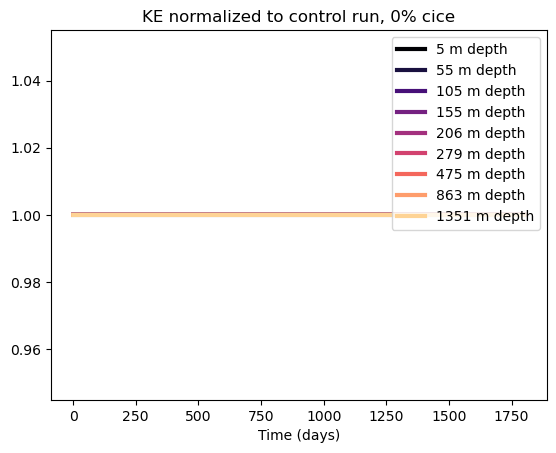

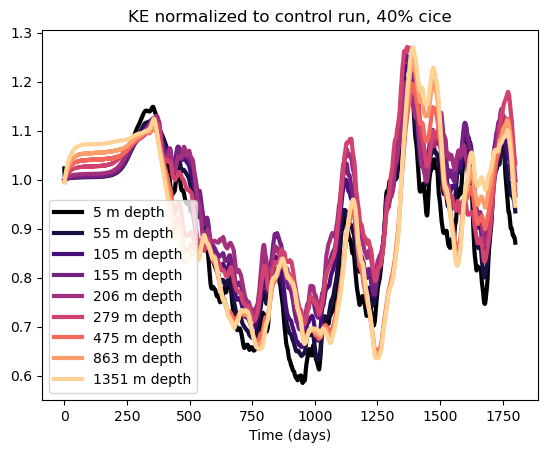

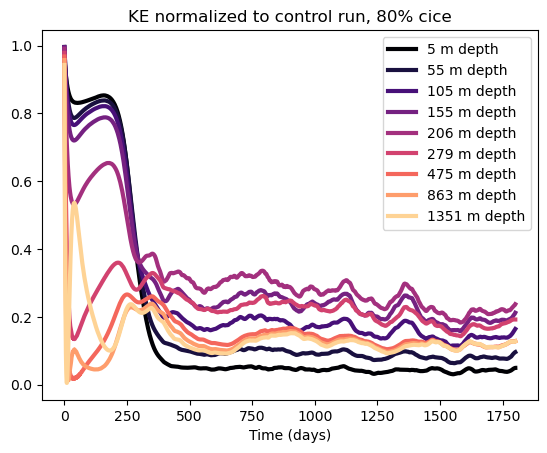

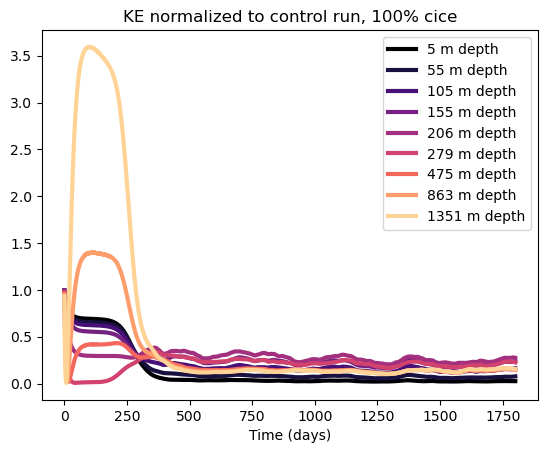

In [25]:
for i in range(len(conc)):
    plt.figure()
    colors = plt.cm.magma(np.linspace(0,1,45))
    for zl in range(0,45,5):
        plt.plot(time, keLevMeanRel[:,zl,i],
                linewidth=3, color=colors[zl],
                label=f"{-levs[zl]:.0f} m depth")
    plt.title(f"KE normalized to control run, {conc[i]}% cice")
    plt.xlabel("Time (days)")
    plt.legend()

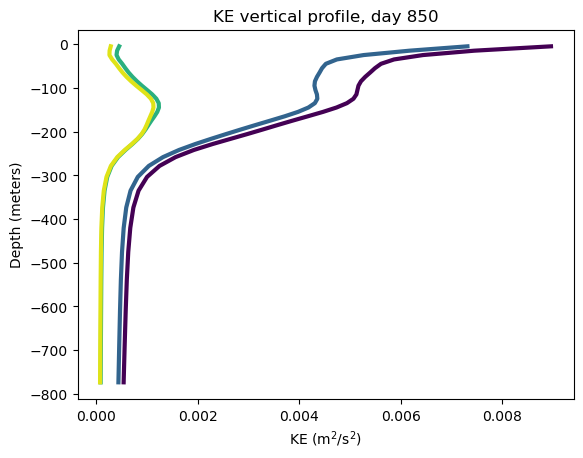

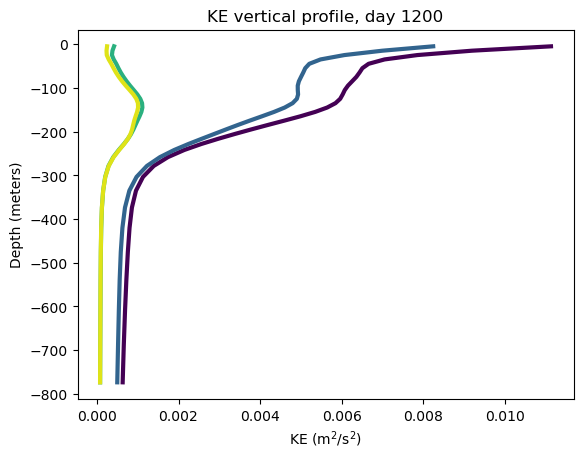

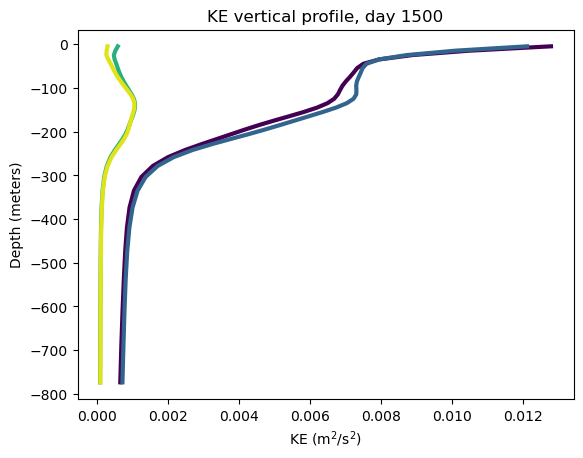

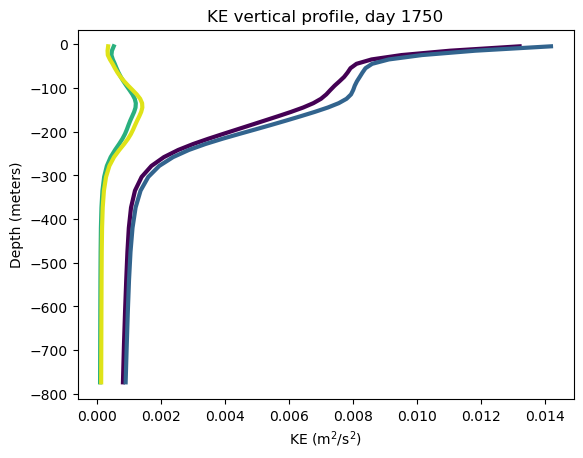

In [33]:
for timestep in [1700,2400,3000,3500]:
    plt.figure()
    for i in range(len(conc)):
        colors = plt.cm.viridis(np.linspace(0,0.95,4))
        plt.plot((keLevMean[timestep,:deepIndex,i]), (levs[:deepIndex]),
                 linewidth=3, color=colors[i],
                 label=f"{conc[i]}% cice run")
        plt.title(f"KE vertical profile, day {time[timestep]:.0f}")
        plt.ylabel("Depth (meters)")
        plt.xlabel("KE ($\mathrm{m}^2/\mathrm{s}^2$)")

### Some thoughts
- High ice concentration doesn't stop BI from developing, it just slows the growth rate.
- The initial growth rate is much more affected by ice than implied by the linear stability analysis
    - Check development at different depths for first 250 days
- Hypothesis mildly supported
    - near surface ~0%
    - Important depth ~20%